In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xgboost as xgb
import time
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score,recall_score, roc_auc_score,precision_score 
from sklearn.preprocessing import MinMaxScaler
from matplotlib.pylab import rcParams
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df = df[df["TotalCharges"] != " "]
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="ignore")

In [4]:
df["TotalCharges"] = df["TotalCharges"].replace([" "],0)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])

In [5]:
df = df.drop(["customerID"], axis=1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [7]:
le = LabelEncoder()
df['Churn']=le.fit_transform(df['Churn'])

In [8]:
df= pd.get_dummies(df, drop_first=True)

In [9]:
scaler = MinMaxScaler()
df[["tenure", "MonthlyCharges","TotalCharges"]] = scaler.fit_transform(df[["tenure", "MonthlyCharges","TotalCharges"]])
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.000000,0.115423,0.001275,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,0.464789,0.385075,0.215867,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0.014085,0.354229,0.010310,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0.619718,0.239303,0.210241,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0.014085,0.521891,0.015330,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0.323944,0.662189,0.227521,0,1,1,1,1,0,...,0,1,0,1,1,0,1,0,0,1
7039,0,1.000000,0.845274,0.847461,0,0,1,1,1,0,...,0,1,0,1,1,0,1,1,0,0
7040,0,0.140845,0.112935,0.037809,0,0,1,1,0,1,...,0,0,0,0,0,0,1,0,1,0
7041,1,0.042254,0.558706,0.033210,1,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1


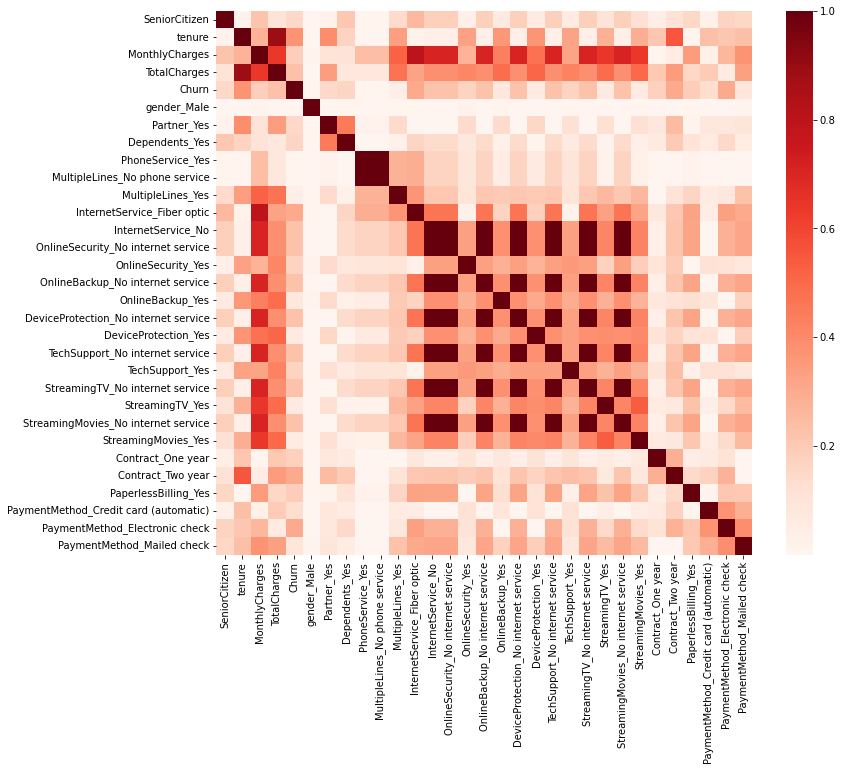

In [10]:
#correlation plot
plt.figure(figsize=(12,10))
cor = df.corr(method="spearman").abs() #create correlation matrix
sns.heatmap(cor, cmap=plt.cm.Reds)
plt.show()

In [11]:
#Select upper triangle of correlation matrix
upper = cor.where(np.triu(np.ones(cor.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop features 
df.drop(to_drop, axis=1, inplace=True)

In [12]:
#Define y,X
y= df["Churn"]
X= df.drop(["Churn"], axis=1)

In [13]:
##Splity X,y into train, val, test
X_train, X_val, y_train, y_val = train_test_split(X,y,random_state=44,train_size=0.6,stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, random_state=44,train_size=0.5,stratify=y_val)

In [14]:
print(X_train.shape,y_train.shape,y_train.sum()/len(y_train))
print(X_val.shape,y_val.shape,y_val.sum()/len(y_val))
print(X_test.shape,y_test.shape,y_test.sum()/len(y_test))

(4219, 22) (4219,) 0.2657027731689974
(1406, 22) (1406,) 0.26600284495021337
(1407, 22) (1407,) 0.2658137882018479


In [30]:
xgbc = xgb.XGBClassifier(n_estimators = 10, booster = "gblinear", random_state=44, scale_pos_weight = 3)

In [15]:
%%time

start = time.time() #czas rozpoczęcia

xgbc.fit(X_train, y_train) # trenowanie modelu

end = time.time() #czas zakończenia
print("time: ", end - start)

time:  0.1356358528137207
Wall time: 136 ms


In [16]:
y_train_predict = xgbc.predict(X_train)


In [17]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      3098
           1       0.50      0.81      0.62      1121

    accuracy                           0.73      4219
   macro avg       0.71      0.76      0.71      4219
weighted avg       0.80      0.73      0.75      4219



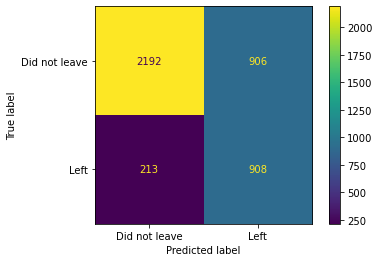

In [18]:
plot_confusion_matrix(xgbc, 
                      X_train, 
                      y_train, 
                      values_format='d', 
                      display_labels=["Did not leave", "Left"])

In [19]:
y_val_predict = xgbc.predict(X_val)

In [20]:
print(classification_report(y_val, y_val_predict))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1032
           1       0.51      0.80      0.62       374

    accuracy                           0.74      1406
   macro avg       0.71      0.76      0.71      1406
weighted avg       0.80      0.74      0.75      1406



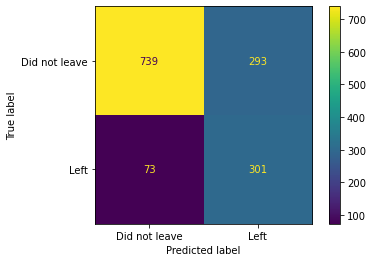

In [21]:
plot_confusion_matrix(xgbc, 
                      X_val, 
                      y_val, 
                      values_format='d', 
                      display_labels=["Did not leave", "Left"])

In [15]:
#Slytherin score

from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [16]:
def function(y_true, y_pred, discount = 0.2):
    
    matrix = confusion_matrix(y_true, y_pred)
    TP = matrix[0][0]
    FP = matrix[0][1]
    FN = matrix[1][0]
    TN = matrix[1][1]
    
    return 1 - (FN + discount*FP)/(TN + discount*TP)

In [17]:
slytherin_score = make_scorer(function)

In [19]:
params_grid = {
    "max_depth": range (2, 10, 1),
    "n_estimators": range (2, 50, 1),
    "scale_pos_weight": range (2, 20, 1),
    "booster": ["gbtree", "gblinear", "dart"],
    "scale_pos_weight": range (2, 20, 1)
}

gridsearch_ss = GridSearchCV(estimator = xgb.XGBClassifier(random_state=44),
                             param_grid = params_grid,
                             scoring = slytherin_score,        
                             n_jobs = -1,
                             verbose = 1,
                             cv = 5
                            )

gridsearch_ss.fit(X_train, y_train)

Fitting 5 folds for each of 20736 candidates, totalling 103680 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                        

In [21]:
gridsearch_ss.best_params_

{'booster': 'gbtree',
 'max_depth': 3,
 'n_estimators': 12,
 'scale_pos_weight': 5}

In [22]:
xgbc_sscore = xgb.XGBClassifier(booster = "gbtree", max_depth = 3, n_estimators = 12, scale_pos_weight = 5, random_state=44)

In [23]:
%%time

start = time.time() #czas rozpoczęcia

xgbc_sscore.fit(X_train, y_train) # trenowanie modelu

end = time.time() #czas zakończenia
print("time: ", end - start)

time:  0.03989052772521973
Wall time: 39.9 ms


In [24]:
y_train_pred_sscore = xgbc_sscore.predict(X_train)

In [25]:
print(classification_report(y_train, y_train_pred_sscore))

              precision    recall  f1-score   support

           0       0.95      0.60      0.73      3098
           1       0.45      0.91      0.60      1121

    accuracy                           0.68      4219
   macro avg       0.70      0.76      0.67      4219
weighted avg       0.82      0.68      0.70      4219



In [27]:
slytherin_score(xgbc_sscore, X_train, y_train)

0.7520791511327789

In [28]:
y_val_pred_sscore = xgbc_sscore.predict(X_val)

In [29]:
print(classification_report(y_val, y_val_pred_sscore))

              precision    recall  f1-score   support

           0       0.95      0.60      0.74      1032
           1       0.45      0.91      0.60       374

    accuracy                           0.68      1406
   macro avg       0.70      0.75      0.67      1406
weighted avg       0.82      0.68      0.70      1406



In [31]:
slytherin_score(xgbc_sscore, X_val, y_val)

0.7475183426845058